In [1]:
import geemap
import ee

# If it is not yet authenticated, uncomment the line below
ee.Authenticate()

Enter verification code:  4/1AZEOvhXeZcfdJWR7reqDyDA4nTYfJAWwnXfeY02Nl7wv4I0WTIsnpdB0yR8



Successfully saved authorization token.


In [2]:
import geemap
import ee

ee.Initialize()

#aoi = ee.Geometry(Point([-48.4, -23]))

dataset = ee.ImageCollection('USDA/NAIP/DOQQ').filter(ee.Filter.date('2016-01-01', '2017-12-31'))

trueColor = dataset.select(['R', 'G', 'B'])
trueColorVis = {
  min: 0.0,
  
  max: 255.0,
}


Map = geemap.Map(center=(39.76,-121.61), zoom=12)
Map.addLayer(trueColor, trueColorVis, 'True Color');
Map

Map(center=[39.76, -121.61], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=HBox(child…

In [5]:
region = ee.Geometry.Rectangle(-121.60, 39.75, -121.62, 39.76)
loc = ee.Geometry.Point(-121.61, 39.76)
collection = (
    ee.ImageCollection('USDA/NAIP/DOQQ')
    .filterBounds(region)
    .filterDate('2016-01-01', '2017-12-31')
    .filter(ee.Filter.listContains("system:band_names", "N"))
)

In [6]:
import os
out_dir = os.path.join(os.path.expanduser('~'), 'Downloads')
print(collection.aggregate_array('system:index').getInfo())

['m_3912112_sw_10_h_20160713', 'm_3912120_nw_10_h_20160713']


In [13]:
geemap.ee_export_image_collection(collection, out_dir=out_dir, scale = 12)

Total number of images: 2

Exporting 1/2: /home/bob/Downloads/m_3912112_sw_10_h_20160713.tif
Generating URL ...
Please wait ...
Data downloaded to /home/bob/Downloads/m_3912112_sw_10_h_20160713.tif


Exporting 2/2: /home/bob/Downloads/m_3912120_nw_10_h_20160713.tif
Generating URL ...
Please wait ...
Data downloaded to /home/bob/Downloads/m_3912120_nw_10_h_20160713.tif




Warning 1: TIFFReadDirectory:Sum of Photometric type-related color channels and ExtraSamples doesn't match SamplesPerPixel. Defining non-color channels as ExtraSamples.


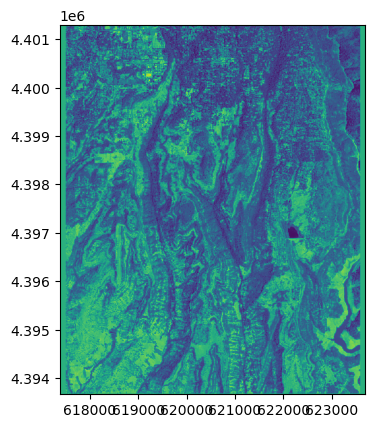

<AxesSubplot:>

In [14]:
import rasterio
from rasterio.plot import show
fp = r'/home/bob/Downloads/m_3912120_nw_10_1_20140725.tif'
img = rasterio.open(fp)
show(img)

In [15]:
raster = img

# Read the grid values into numpy arrays
red = raster.read(3)
green = raster.read(2)
blue = raster.read(1)
alpha = raster.read(4)

# Function to normalize the grid values
def normalize(array):
    """Normalizes numpy arrays into scale 0.0 - 1.0"""
    array_min, array_max = array.min(), array.max()
    return ((array - array_min)/(array_max - array_min))

# Normalize the bands
red_normal = normalize(red)
green_normal = normalize(green)
blue_normal = normalize(blue)
alpha_normal = normalize(alpha)

print("Normalized bands")
print(red_normal.min(), '-', red_normal.max(), 'mean:', red_normal.mean())
print(green_normal.min(), '-', green_normal.max(), 'mean:', green_normal.mean())
print(blue_normal.min(), '-', blue_normal.max(), 'mean:', blue_normal.mean())
print(alpha_normal.min(), '-', alpha_normal.max(), 'mean:', alpha_normal.mean())


Normalized bands
0.0 - 1.0 mean: 0.3097593537390911
0.0 - 1.0 mean: 0.42496250229143967
0.0 - 1.0 mean: 0.4155758666946675
0.0 - 1.0 mean: 0.5023102395960403


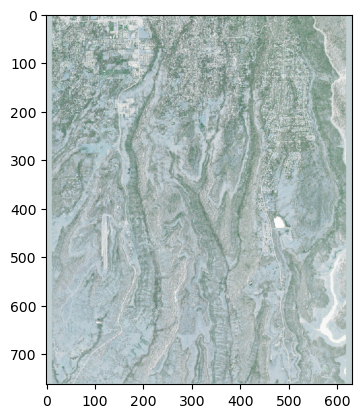

In [16]:
import numpy as np
import matplotlib.pyplot as plt
# Create RGB natural color composite
rgb = np.dstack((red_normal, green_normal, blue_normal, alpha_normal))

# Let's see how our color composite looks like
plt.imshow(rgb)

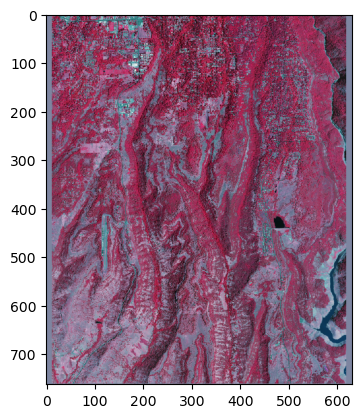

In [17]:
# Read the grid values into numpy arrays
nir = raster.read(4)
red = raster.read(3)
green = raster.read(2)

# Normalize the values using the function that we defined earlier
nirn = normalize(nir)
redn = normalize(red)
greenn = normalize(green)

# Create the composite by stacking
nrg = np.dstack((nirn, redn, greenn))

# Let's see how our color composite looks like
plt.imshow(nrg)

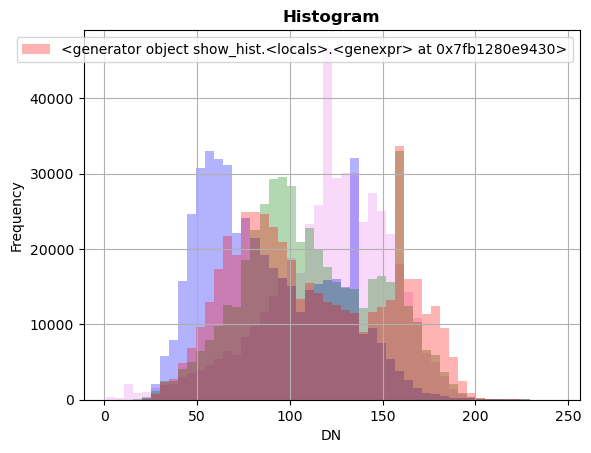

In [18]:
from rasterio.plot import show_hist

show_hist(raster, bins=50, lw=0.0, stacked=False, alpha=0.3,
      histtype='stepfilled', title="Histogram")